<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
Modélisation statistiques
</h1>

In [1]:
# Librairies standards
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

import xgboost as xgb
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV,RidgeCV,Ridge,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm



import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

import declaration as d


In [2]:
# Définition du répertoire de travail
HOME_DIR = Path.cwd().parent
DATA_DIR = Path(HOME_DIR, "data")
print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: /home/onyxia/work/projet-Python/projet 
Data directory: /home/onyxia/work/projet-Python/projet/notebook


In [3]:
Principal_data4 = pd.read_csv(Path(DATA_DIR, "Principal_data.csv"))

In [4]:
#Principal_data4= Principal_data4.drop(columns='Niveau priotaire')

<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
I- feature scaling des variables
</h1>

Les variables de notre jeu de données ayant une très grande échelle, nous allons faire du feature scaling (les remettre à l'échelle) pour rendre nos données homogènes. La méthode privilégiée dans notre cas est la standardisation car les méthodes (regression logistique ) utilisées reposent sur l'hypothèse de normalité.

<h2 style=" text-align:left">
I.1-Formatage des variables
</h2>


Il est question de reformater le types de nos variables , selon qu'elle soit quantitative ou quantitative avant de proceder à leur encodage.

In [5]:
Principal_data4['sexe'] = Principal_data4['sexe'].astype('object')
Principal_data4['dept'] = Principal_data4['dept'].astype('object')



## Variable numériques
col_num = Principal_data4.select_dtypes(['int64','float64']).columns


## Variable catégorielle
col_cat=Principal_data4.select_dtypes(['object']).columns
#var_cat=['cla_age_5','sexe','dept','Niveau prioritaire']




<h2 style=" text-align:left">
I.1-Formatage des variables
</h2>

Dans cette partie il est question de verifier si les données sont bien formaté et verifier les valeurs manquantes

In [6]:
# Utilisation de la fonction de formatage des données 
d.formatage_variable(Principal_data4)


Les types de nos variables:
cla_age_5              object
sexe                   object
dept                   object
prev                  float64
Niveau prioritaire     object
o3                    float64
dtype: object

Variables numériques: 
Index(['prev', 'o3'], dtype='object')

 Variables catégorielles: 
Index(['cla_age_5', 'sexe', 'dept', 'Niveau prioritaire'], dtype='object')

Proportion des valeurs manquantes:
             Variable  Proportion de valeurs manquantes (%)
0           cla_age_5                                   0.0
1                sexe                                   0.0
2                dept                                   0.0
3                prev                                   0.0
4  Niveau prioritaire                                   0.0
5                  o3                                   0.0
Nombre d'observations : 1351


Conclusion:
- Les données sont bels et bien formaté et
- aucune valeurs manquantes ou infini dans notre de datasets, donc nous pourrons impléter nos modèles dans soucis par la suite .

<h2 style= "text-align:left">
I.2- Encodage des variables numériques   
</h2>

Dans notre travail nous avons choisi la standardisation normale, car après revue de littérature la standardisation normale est le plus approprié dans les modèles que nous allons implementer à l'instar de: XGboost, randomforest, regression linéaire...

<h3 style= "text-align:left">
 Standardisation classique (Z-score normalization) 
</h3>

**Fonction de standardisation**


In [7]:
# standardisation des variables numériques
Principal_data4[col_num] = StandardScaler().fit_transform(Principal_data4[col_num])

In [8]:

d.verification_normalisation(Principal_data4[col_num])

les statistiques pour la variable prev
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 
les statistiques pour la variable o3
La moyenne est de : 0.0 
L'écart type est de : 1.0 
 
 


<h2 style= "text-align:left">
I.3- Encodage des variables catégorielles 
</h2>

Les modèles de machine Learning qui seront dévéloppés étant les modèles de regression, il est impératif de transformer les variables catégorielles de notre data set en variables numériques "quantitatives" (car se ne sont pas réellement les variables numériques) pour que le modèle puisse fonctionné Car ces modèles ne prennent en compte que les varibles numériques voire quantitative.

pour l'encodage des variables categorielles la methode utilisée sera celle du One-Hot Encoding qui consiste à diviser une variable catégorielle en N variables où chaque nouvelle variable correspond à une modalité prise par la variable catégorielle. Chaque variable créée est codée en 0 ou 1 selon la présence ou l'absence de cette modalité pour la ligne.

Le choix du One-Hot Encoding se justifie par le fait qu'il ne prend pas en compte l'ordre qui existe entre les variables et qu'on peut interprété les variables comme categorielles en calculant les proportions.

In [9]:
# affichage de l'entête de la base de donnée pour les variables categorielles
Principal_data4[col_cat].head()

,cla_age_5,sexe,dept,Niveau prioritaire
0,85-89,2,77,"1,2,3"
1,85-89,2,91,"1,2,3"
2,85-89,2,93,"1,2,3"
3,85-89,9,77,"1,2,3"
4,85-89,9,78,"1,2,3"


**Création d'une instance one-hot-encoder**

Cette fonction effectue un encodage One-Hot sur les colonnes catégorielles et renvoie le DataFrame final.
Elle comme paramètre: 
- dataframe : pd.DataFrame ,Le DataFrame à traiter.
- col_cat : list, Liste des colonnes catégorielles à encoder.
- col_num : list,Liste des colonnes numériques à conserver.

Elle retourne:
- pd.DataFrame Le DataFrame final après encodage One-Hot et concaténation.

In [10]:
df_final = d.encoder_onehot(Principal_data4, col_cat, col_num)
print(pd.DataFrame(df_final))

Index(['prev', 'o3', 'cla_age_5_05-09', 'cla_age_5_10-14', 'cla_age_5_15-19',
       'cla_age_5_20-24', 'cla_age_5_25-29', 'cla_age_5_30-34',
       'cla_age_5_35-39', 'cla_age_5_40-44', 'cla_age_5_45-49',
       'cla_age_5_50-54', 'cla_age_5_55-59', 'cla_age_5_60-64',
       'cla_age_5_65-69', 'cla_age_5_70-74', 'cla_age_5_75-79',
       'cla_age_5_80-84', 'cla_age_5_85-89', 'cla_age_5_90-94',
       'cla_age_5_95et+', 'cla_age_5_tsage', 'sexe_2', 'sexe_9', 'dept_77',
       'dept_78', 'dept_91', 'dept_92', 'dept_93', 'dept_94', 'dept_95',
       'Niveau prioritaire_2', 'Niveau prioritaire_3'],
      dtype='object')
          prev        o3  cla_age_5_05-09  cla_age_5_10-14  cla_age_5_15-19  \
0     2.659867  1.102681              0.0              0.0              0.0   
1     2.302544  0.706194              0.0              0.0              0.0   
2     2.638453 -0.467969              0.0              0.0              0.0   
3     2.893611  1.102681              0.0              0.0 

<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
II-Crossing validation 
</h1>


<h2 style= "text-align:left">
II.1- Division des données en train et en test
</h2>


pour notre cas nous attribuerons 80% de nos données entrainnement et 20% pour le test dans le but d'éviter que les resultats de nos prédictions soient du au hasard, nous ferrons usage de la fonction "random_state = 42" d'enlever les effets de l'aléa et pour permettre la reproductibilité de nos modèles.

In [11]:
# Division les données de data_cleaned_encode en ensembles d'apprentissage et de test

train, test = train_test_split(df_final, test_size=0.2, random_state=42)
print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(train.shape[0],
                                                            test.shape[0]))

Entrainement: 1080 lignes,
Test: 271 lignes.



<h3 style= "text-align:left">
a-  selection des features sur la base de train
</h3>



Par la suite nous allons travailler uniquement sur les données Train afin de tester nos resulats sur les données de **test** tirés indépendamment des données train

In [12]:
#resumé statistique des variables de la base de train
train.describe()

,prev,o3,cla_age_5_05-09,cla_age_5_10-14,cla_age_5_15-19,cla_age_5_20-24,cla_age_5_25-29,cla_age_5_30-34,cla_age_5_35-39,cla_age_5_40-44,...,sexe_9,dept_77,dept_78,dept_91,dept_92,dept_93,dept_94,dept_95,Niveau prioritaire_2,Niveau prioritaire_3
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.011309,-0.005686,0.017593,0.017593,0.017593,0.015741,0.017593,0.020370,0.027778,0.049074,...,0.349074,0.122222,0.120370,0.125926,0.129630,0.127778,0.119444,0.121296,0.233333,0.395370
std,1.015707,0.999827,0.131526,0.131526,0.131526,0.124528,0.131526,0.141329,0.164412,0.216123,...,0.476898,0.327694,0.325545,0.331920,0.336051,0.333997,0.324461,0.326623,0.423149,0.489157
min,-0.680913,-1.566914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.634280,-0.919276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.547658,-0.467969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.289407,0.971369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.725129,1.102681,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
train.select_dtypes(include=["float64", "int64"]).columns

Index(['prev', 'o3', 'cla_age_5_05-09', 'cla_age_5_10-14', 'cla_age_5_15-19',
       'cla_age_5_20-24', 'cla_age_5_25-29', 'cla_age_5_30-34',
       'cla_age_5_35-39', 'cla_age_5_40-44', 'cla_age_5_45-49',
       'cla_age_5_50-54', 'cla_age_5_55-59', 'cla_age_5_60-64',
       'cla_age_5_65-69', 'cla_age_5_70-74', 'cla_age_5_75-79',
       'cla_age_5_80-84', 'cla_age_5_85-89', 'cla_age_5_90-94',
       'cla_age_5_95et+', 'cla_age_5_tsage', 'sexe_2', 'sexe_9', 'dept_77',
       'dept_78', 'dept_91', 'dept_92', 'dept_93', 'dept_94', 'dept_95',
       'Niveau prioritaire_2', 'Niveau prioritaire_3'],
      dtype='object')

**Matrice de Corelation**

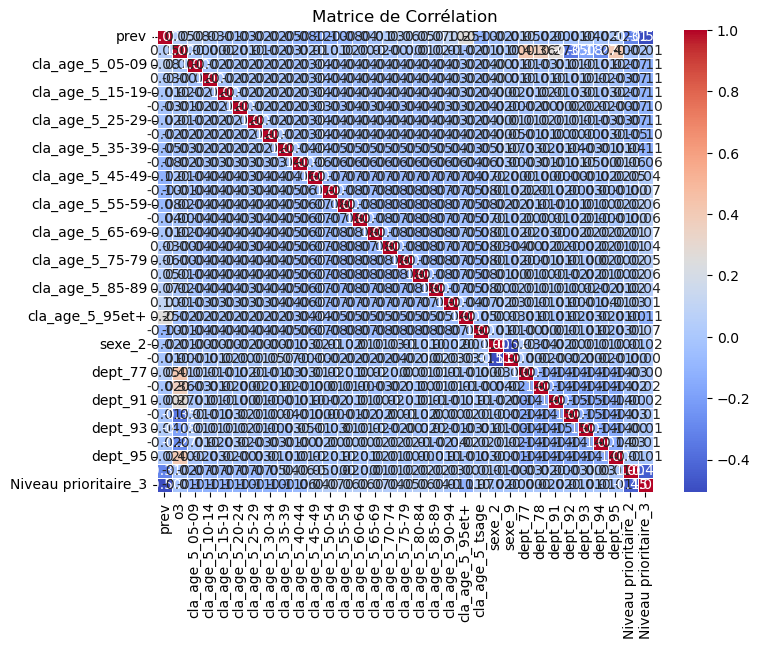

In [14]:
# Calculer la matrice de corrélation
corr_matrix = train.corr()

# Tracer la matrice de corrélation avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

Nos variables ne sont pas très correlés car elles sont bleus pour la pluspart

**Selection des variables à partir de la correlation de pearson**

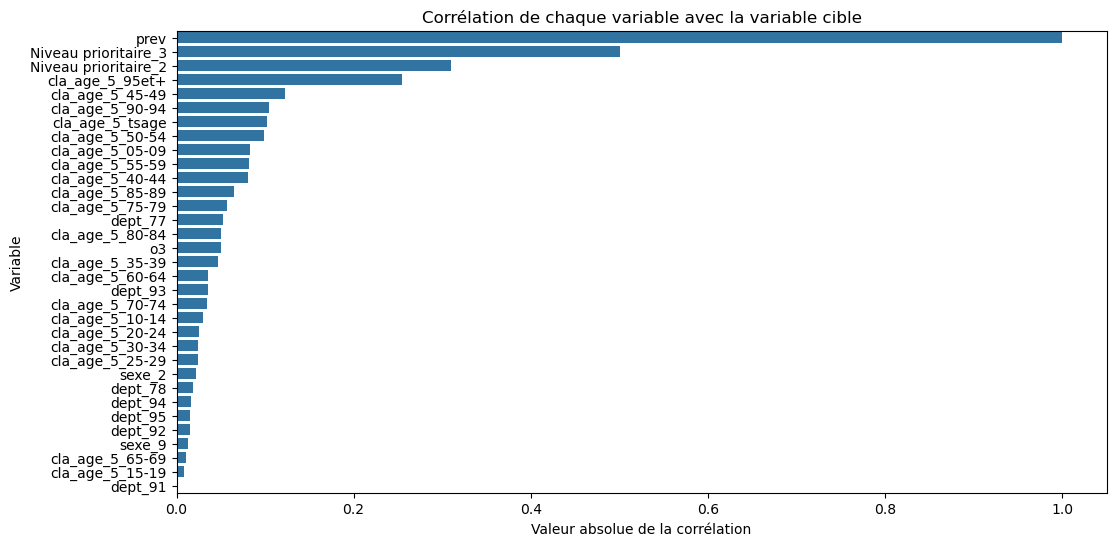

In [15]:
# Convertir les colonnes numériques en float, en gérant les erreurs
train = train.apply(pd.to_numeric, errors='coerce')

# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()['prev']).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la variable cible")
plt.show()


Interpretation:
- On remarque que la prévalence est très correlé au niveau priotaire, peut importe la catégories
- La prevalence est très correlés au personnes agées
- La prevalence varie aussi fortement 

- "cla_age_5_65-69" ou "no2" ont des corrélations proches de zéro, ce qui indique qu'elles sont probablement moins pertinentes pour expliquer ou prédire la variable cible.

**Recuperer les train et les test**

Par la suite nous allons  convertir le X_TRAIN EN float si elles sont numérique afin d'assurer une bonne prédiction

In [16]:
import statsmodels.api as sm

# Séparation des variables prédictives et de la variable cible
X_train = train.drop("prev", axis=1)
y_train = train["prev"]

# Convertir toutes les colonnes de X_train en float (si elles sont numériques)
X_train = X_train.astype(float)

# Vérification après conversion
print(X_train.dtypes)


X_test = test.drop("prev", axis=1)
y_test = test["prev"]

o3                      float64
cla_age_5_05-09         float64
cla_age_5_10-14         float64
cla_age_5_15-19         float64
cla_age_5_20-24         float64
cla_age_5_25-29         float64
cla_age_5_30-34         float64
cla_age_5_35-39         float64
cla_age_5_40-44         float64
cla_age_5_45-49         float64
cla_age_5_50-54         float64
cla_age_5_55-59         float64
cla_age_5_60-64         float64
cla_age_5_65-69         float64
cla_age_5_70-74         float64
cla_age_5_75-79         float64
cla_age_5_80-84         float64
cla_age_5_85-89         float64
cla_age_5_90-94         float64
cla_age_5_95et+         float64
cla_age_5_tsage         float64
sexe_2                  float64
sexe_9                  float64
dept_77                 float64
dept_78                 float64
dept_91                 float64
dept_92                 float64
dept_93                 float64
dept_94                 float64
dept_95                 float64
Niveau prioritaire_2    float64
Niveau p

**Etant données que nos variables ne sont pas fortement correlés , nous retenons toutes les varaiables de notre data initial train pour la modélisation**

<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
II- Modélisation et choix du modèle
</h1>


Nous allons tester 4 algorithmes de regression à savoir: 
-  L'algorithme de regression linéaire
-  l'algorithme Linear_SVR 
-  L'algorithme de RandomForest Regressor 
-  L'algorithme XGBoost
comme technique de validation croisée nous allons utiliser la méthode du Train test split car ayant un jeu de donnée à Plus de 1000 observations, elle sera efficace et rapide pour l'évaluation du modèle.

<h2 style= "text-align:left">
1- Sans hyper paramètres
</h2>

Dans un premier temps nous allons tester des modèles sans hyper paramètre. Par la suite nous allons optimiser ces modèles afin d'avoir de meilleur resultats

In [17]:
## Chargement de nos differents modèles 
lr = LinearRegression()
lsvr = LinearSVR(random_state=42, tol=1e-05)
clf = RandomForestRegressor(max_depth=2, random_state=42)
xgb = XGBRegressor(max_depth=2,random_state=42)

<h3 style= "text-align:left">
a-  Regression linéaire 
</h3>

In [18]:
# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table.head()

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.863382,0.086863,9.939538,2.621939e-22,0.692936,1.033828
o3,-0.016993,0.016877,-1.006909,3.142108e-01,-0.050109,0.016123
cla_age_5_05-09,-0.264126,0.129516,-2.039325,4.166805e-02,-0.518267,-0.009985
cla_age_5_10-14,-0.666525,0.129514,-5.146335,3.170135e-07,-0.920662,-0.412388
cla_age_5_15-19,-0.953328,0.129492,-7.362077,3.655509e-13,-1.207420,-0.699235


In [19]:
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_lr_pred)))
print("Coefficient of determination (R²): %.2f"% r2_score(y_test, y_lr_pred))

RMSE: 0.40
Coefficient of determination (R²): 0.81


In [20]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.846
1,Dependent Variable:,prev,AIC:,1110.3535
2,Date:,2024-12-29 20:04,BIC:,1269.8644
3,No. Observations:,1080,Log-Likelihood:,-523.18
4,Df Model:,31,F-statistic:,192.1
5,Df Residuals:,1048,Prob (F-statistic):,0.00
6,R-squared:,0.850,Scale:,0.15898


**Interpretation des resultats**

- Nous obtenons un R2 ajusté **84,7 %**  , proche de 1, ce qui montre un bon ajustement de notre modèle sur nos données d'entrainement.

- Un échantilon grand et une grand F-STAT presque nulle; ceci indique que le modèle dans son ensemble est statistiquement significatif. Cela signifie que les prédicteurs inclus expliquent mieux la variabilité que le hasard.
- AIC (1106.7178) et BIC (1271.2440): ces indicateurs sont plutot élévés


En conclusion,
Notre modèle de regression linéaire est globalement performant, donc peut nous aider à expliquer la prévalence des maladies pulmonaire en fonction de la qualité de l'air et des autres variables.



<h3 style= "text-align:left">
b-  Support Vector Model (SVM)
</h3>

In [21]:
lsvr.fit(X_train, y_train)
y_lsvr_pred = lsvr.predict(X_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_lsvr_pred)))
print("Coefficient of determination (R²): %.2f"% r2_score(y_test, y_lsvr_pred))

RMSE: 0.43
Coefficient of determination (R²): 0.78


Resultats:
- RMSE est de 0,43, considérée comme élevée car la variable à prédire suit une repartion de la loi loi normale de variance 1
- Le R2 vaut 78%, est faible, indique que le modèle capture peu de la variabilité de la cible.


Conlusion:
Notre modèle explique mal la prévalence des maladies pulmonaires à parties de l'indice de l'air ainsi de des autres variables de notre dataset

<h3 style= "text-align:left">
c-  RANDOM FOREST 
</h3>

In [22]:
## Modèle
clf.fit(X_train, y_train)

## Prédiction sur les données test 
y_rdf_pred = clf.predict(X_test)

## metrisue d'evaluation du 
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_rdf_pred)))
print("Coefficient of determination (R²): %.2f"% r2_score(y_test, y_rdf_pred))

RMSE: 0.62
Coefficient of determination (R²): 0.56


Resultats:
- RMSE est de 0.53, considérée comme neutre car la vaiable à prédire suit une repartion de la loi loi normale de variance 1
- Le R2 vaut 67%, est  relativement faible, indique que le modèle capture peu de la variabilité de la cible.


Conlusion:
Le random forest  n'explique pas réélement  la prévalence des maladies pulmonaires à parties de l'indice de l'air ainsi de des autres variables de notre dataset

<h3 style= "text-align:left">
d-  XGBOOST 
</h3>


In [23]:
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_xgb_pred)))

print("Coefficient of determination (R²): %.2f"% r2_score(y_test, y_xgb_pred))

RMSE: 0.30
Coefficient of determination (R²): 0.90


<h2 style= "text-align:left">
  Resumé des modèles simple 
</h2>


In [24]:
model_simple = {
        "regression lineaire": LinearRegression(),
        "Random Forest": RandomForestRegressor(),
        "svm": LinearSVR(),
        "xgb": XGBRegressor()
    }

d.evaluate_models_simple(model_simple, X_train, X_test, y_train, y_test)

{'regression lineaire': {'RMSE': 0.4028608231170307,
  'R2 Score': 0.8145372270893504},
 'Random Forest': {'RMSE': 0.09981590425773702, 'R2 Score': 0.988614655704977},
 'svm': {'RMSE': 0.4348900808981832, 'R2 Score': 0.7838746638265708},
 'xgb': {'RMSE': 0.08856969454866094, 'R2 Score': 0.9910356878446119}}

En se basant sur le R2, RMSE, nous nous apercevons que les modèles le modèle le plus performants sans hyperparamètre est le **random forest** suivie du **XGboost**


Dans la suite de notre travail nous allons optimiser ces differents modèles 

<h2 style= "text-align:left">
2- Optimisation des modèles avec hypers paramètres
</h2>

<h3 style= "text-align:left">
a-  Optimisation du  modèle SVM 
</h3>


In [25]:


# Définir le modèle
lsvr = LinearSVR(random_state=42, tol=1e-05)

# Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10],          # Paramètre de régularisation
    'epsilon': [0.01, 0.1, 1],  # Taille du tube
    'max_iter': [10,50, 100]  # Nombre maximum d'itérations
}

# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=lsvr,
    param_grid=param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Utiliser RMSE négatif comme métrique
    cv=5,  # Validation croisée à 5 plis
    verbose=2,
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Appliquer la recherche sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score (MSE) :", grid_search.best_score_)

# Modèle optimisé
best_model = grid_search.best_estimator_

# Évaluation sur les données de test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE sur les données de test :", mse)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

[CV] END ...................C=0.1, epsilon=0.01, max_iter=10; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, max_iter=10; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, max_iter=50; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, max_iter=50; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, max_iter=10; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, max_iter=50; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, max_iter=50; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, max_iter=50; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.01, max_iter=100; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.01, max_iter=100; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.01, max_iter=100; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.01, max_iter=100; total time=   0.0s
[CV] END ..................C

arnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of i

<h3 style= "text-align:left">
b-  Optimisation de la regression lineaire 
</h3>

In [26]:
# Définir les modèles Ridge et Lasso
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Résultats des modèles optimisés
results = {}

for name, model in models.items():
    # Créer un pipeline avec normalisation
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalisation des données
        ('model', model)               # Modèle Ridge ou Lasso
    ])
    
    # Définir la grille d'hyperparamètres spécifique au modèle
    param_grid = {
        'model__alpha': [0.01, 0.1, 1, 10, 100],  # Coefficient de régularisation
        'model__fit_intercept': [True, False]
    }
    
    # Configurer GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),  # RMSE négatif
        cv=5,  # Validation croisée à 5 plis
        verbose=2,
        n_jobs=-1  # Utiliser tous les cœurs disponibles
    )
    
    # Ajuster GridSearchCV aux données
    grid_search.fit(X_train, y_train)
    
    # Récupérer les meilleurs paramètres et les performances
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    results[name] = {"Best Parameters": best_params, "Best Score (MSE)": best_score}
    
    # Évaluer le modèle optimisé sur les données de test
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    results[name]["Test MSE"] = test_mse

# Afficher les résultats
for model_name, result in results.items():
    print(f"\nRésultats pour le modèle {model_name}:")
    for key, value in result.items():
        print(f"{key}: {value}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.0s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.0s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.0s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.0s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.0s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.0s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.0s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.0s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.0s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.0s
[CV] END ........model__alpha=0.1, model__fit_intercept=True; total time=   0.0s
[CV] END ........model__alpha=0.1, model__fit_intercept=True; total time=   0.0s
[CV] END ........model__alph


<h3 style= "text-align:left">
c- Optimisation du random forest 
</h3>

In [27]:


# Définir le modèle
clf_op = RandomForestRegressor(random_state=42)

# Définir la grille d'hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],         # Nombre d'arbres
    'max_depth': [2, 5, 10, None],          # Profondeur maximale
    'min_samples_split': [2, 5, 10],        # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],          # Minimum d'échantillons dans une feuille
    'max_features': ['auto', 'sqrt', 'log2']  # Nombre de caractéristiques à considérer
}

# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=clf_op,
    param_grid=param_grid,
    cv=5,  # Validation croisée à 5 plis
    scoring='neg_mean_squared_error',  # Scorer basé sur l'erreur quadratique moyenne négative
    verbose=2,
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Appliquer GridSearchCV aux données d'entraînement
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score (MSE) :", -grid_search.best_score_)

# Modèle optimisé
best_model = grid_search.best_estimator_

# Évaluer sur les données de test
y_pred = best_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test :", rmse)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

<h2 style= "text-align:left">
Resumé des resultats de l'optimisation
</h2>

In [29]:
model_op = {
        "Ridge": Ridge(alpha=0.01, fit_intercept=False),
        "Random Forest": RandomForestRegressor(max_depth= 5, 
                  max_features= 'sqrt', min_samples_leaf= 4, 
                  min_samples_split= 10, n_estimators= 300),
        "svm": LinearSVR(C= 1, epsilon= 0.1, max_iter= 100)
    }

d.evaluate_models_simple(model_op, X_train, X_test, y_train, y_test)

{'Ridge': {'RMSE': 0.40288969780659317, 'R2 Score': 0.8145106403795004},
 'Random Forest': {'RMSE': 0.6624623062807854,
  'R2 Score': 0.49850221208789436},
 'svm': {'RMSE': 0.41813860950968595, 'R2 Score': 0.800203802433333}}

<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
III- CONCLUSION
</h1>

Au long de notre analyse nous avons tester 04 modèles la regression linéaire,SVM, Random forest et XGboost, le meilleur modèle optimiser ou pas reste le **Random forest** 